In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

# Корреляция

- $H_0$ – коэффициент корреляции равен нулю
- $H_1$ – коэффициент корреляции не равен нулю

Значимость рассчитывается с использованием t-распределения с количеством степеней свободы $df = N - 2$.

**Условия применения:**

1. Связь линейна и монотонна (нарастает или убывает в одном направлении, не меняя его)
2. Отсутствуют выбросы
3. Переменные нормально распределены

В случае нарушения этих допущений могут быть полезны коэффициенты корреляции Спирмена и Кэндалла, которые вместо реальных значений анализируют их ранги.

<AxesSubplot:>

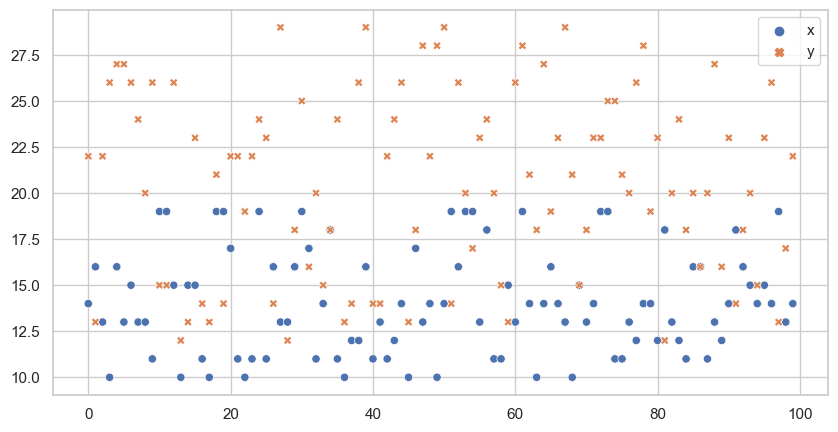

In [29]:
x = np.random.randint(10, 20, 100)
y = np.random.randint(12, 30, 100)
data = pd.DataFrame({'x': x, 'y': y})
sns.set(style='whitegrid', rc={'figure.figsize':(10,5)})
sns.scatterplot(data)

In [30]:
# y опционален, можно дать массив с несколькими колонками, функция строит матрицу корреляций# через scipy (даёт значение коэффициента корреляции и p-значение)
stats.pearsonr(x, y) 
stats.spearmanr(x, y)
stats.kendalltau(x, y) 

SignificanceResult(statistic=-0.02933674153115382, pvalue=0.688724452219694)

In [31]:
# через numpy (только Пирсона, без p-значений)
np.corrcoef(x, y)

array([[ 1.        , -0.07682567],
       [-0.07682567,  1.        ]])

# Регрессия

Условия применения:

1. Связь линейна и монотонна
2. Остатки распределены нормальным образом
3. Нет выбросов
4. Дисперсия ЗП однородна на всех уровнях НП (гомоскедастичность)

Основное уравнение линейной регрессии:
$$
Y=b_0+b_1X+\epsilon
$$

Классический метод нахождения оптимальных параметров уравнения линейной регрессии – метод наименьших квадратов (МНК).
$$
b_1 = \frac{\delta_y}{\delta_x}r_{xy}
$$
$$
b_0 = \bar{Y} - b_1\bar{X}
$$

- $H_0$ – $b_1$ равен нулю
- $H_1$ – $b_1$ не равен нулю

In [36]:
b1 = y.std() / x.std() * stats.pearsonr(x, y)[0]
b1

-0.1359423274974253

In [37]:
b0 = y.mean() - b1 * x.mean()
b0

22.47270854788877

<AxesSubplot:>

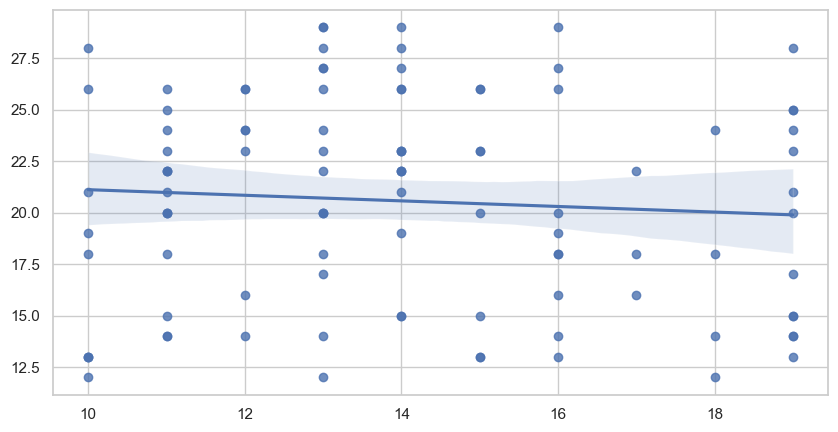

In [46]:
sns.regplot(x=x, y=y)

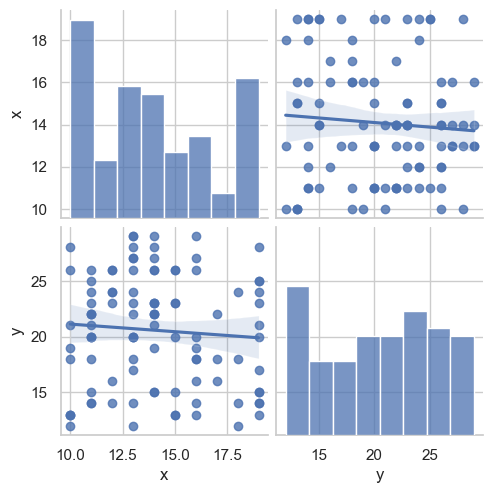

In [48]:
sns.pairplot(data, kind='reg')

In [40]:
# через scipy (только одномерная)
stats.linregress(x, y)  # slope - b1, intercept - b0

LinregressResult(slope=-0.13594232749742532, intercept=22.47270854788877, rvalue=-0.07682567081097492, pvalue=0.447421012443716, stderr=0.1782173010343607, intercept_stderr=2.55684381158417)

In [43]:
# через statsmodels
import statsmodels.api as sm
X = sm.add_constant(x)  # добавить константу, чтобы был свободный член
model = sm.OLS(y, X)  # говорим модели, что у нас ЗП, а что НП
results = model.fit()  # строим регрессионную прямую
results.summary()  # смотрим результат

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5818
Date:                Tue, 27 Jun 2023   Prob (F-statistic):              0.447
Time:                        13:11:59   Log-Likelihood:                -301.79
No. Observations:                 100   AIC:                             607.6
Df Residuals:                      98   BIC:                             612.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4727      2.557      8.789      0.000      17.399      27.547
x1            -0.1359      0.178     -0.763      0.447      -0.490       0.218
==============================================================================
Omnibus:                       23.244   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.381
Skew:                          -0.107   Prob(JB):                       0.0678
Kurtosis:                       1.884   Cond. No.                         73.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# то же самое можно через формулу
import statsmodels.formula.api as smf 
results = smf.ols('y ~ x', data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.5818
Date:                Tue, 27 Jun 2023   Prob (F-statistic):              0.447
Time:                        13:12:31   Log-Likelihood:                -301.79
No. Observations:                 100   AIC:                             607.6
Df Residuals:                      98   BIC:                             612.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4727      2.557      8.789      0.000      17.399      27.547
x             -0.1359      0.178     -0.763      0.447      -0.490       0.218
==============================================================================
Omnibus:                       23.244   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.381
Skew:                          -0.107   Prob(JB):                       0.0678
Kurtosis:                       1.884   Cond. No.                         73.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **intercept** – это свободный член ($b_0$), в других моделях может выглядеть как Intercept
- Ниже располагается независимая переменная
- Значения, связанные с $b_0$, интерпретировать не нужно, нас интересует именно угол наклона
- **coef** – значение коэффициента, отрицательные значения означают отрицательную взаимосвязь, положительные - положительную
- **std** **err** – стандартная ошибка
- **t** – t-критерий
- **P > |t|** – p-значение
- Последним идёт 95%-ый доверительный интервал

В правой верхней части таблицы находятся показатели качества модели (в первую очередь нам интересны $R^{2}$ и его скорректированная разновидность).

В нижней части таблицы указаны диагностические характеристики модели. 

Omnibus и Jarque-Bera - это два разных теста нормальности остатков (prob - их p-значение)

skew - коэффициент асимметрии

kurtosis - коэффициент эксцесса (насколько вытянутое или плоское распределение остатков)

Durbin-Watson - тест автокорреляции остатков (должен быть между 0 и 4)

Cond. No. - показатель мультиколлинеарности (желательно меньше 2, но на практике главное, чтобы там не было гигантского числа в 5-6 знаков)